# Data & Library Import

In [58]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
%matplotlib inline

In [2]:
# Reading the data
data = pd.read_csv('Customer_Segmentation.csv')
data.head()

,CUSTOMER_ID,LAST_DATE,MONTH_RECENCY,TRX_COUNT,VISIT_COUNT,REVENUE,CAT_1_TRX_PEN,CAT_2_TRX_PEN,CAT_3_TRX_PEN,CAT_4_TRX_PEN,...,CAT_10_DIST_SUBCAT_PEN,CAT_11_DIST_SUBCAT_PEN,CAT_12_DIST_SUBCAT_PEN,CAT_13_DIST_SUBCAT_PEN,CAT_14_DIST_SUBCAT_PEN,CAT_15_DIST_SUBCAT_PEN,CAT_16_DIST_SUBCAT_PEN,CAT_17_DIST_SUBCAT_PEN,CAT_18_DIST_SUBCAT_PEN,CAT_19_DIST_SUBCAT_PEN
0,-2.322982e+09,06-Jan-21,4,1,1,110.95,0.000000,0.000000,0.00,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.000000
1,-2.323002e+09,28-Nov-20,6,4,4,1998.02,0.000000,0.250000,0.00,0.250000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.0,0.000000
2,-2.323123e+09,26-Jan-21,4,4,3,232.92,0.000000,0.250000,0.25,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,-2.323131e+09,28-Mar-21,2,3,2,3351.00,0.333333,0.000000,0.00,0.333333,...,0.066667,0.0,0.133333,0.0,0.0,0.266667,0.000000,0.0,0.0,0.066667
4,-2.323236e+09,15-Apr-21,1,3,3,60.97,0.000000,0.333333,0.00,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [3]:
# Summary of the data
data.describe()

,CUSTOMER_ID,MONTH_RECENCY,TRX_COUNT,VISIT_COUNT,REVENUE,CAT_1_TRX_PEN,CAT_2_TRX_PEN,CAT_3_TRX_PEN,CAT_4_TRX_PEN,CAT_5_TRX_PEN,...,CAT_10_DIST_SUBCAT_PEN,CAT_11_DIST_SUBCAT_PEN,CAT_12_DIST_SUBCAT_PEN,CAT_13_DIST_SUBCAT_PEN,CAT_14_DIST_SUBCAT_PEN,CAT_15_DIST_SUBCAT_PEN,CAT_16_DIST_SUBCAT_PEN,CAT_17_DIST_SUBCAT_PEN,CAT_18_DIST_SUBCAT_PEN,CAT_19_DIST_SUBCAT_PEN
count,4.725400e+04,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,...,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000,47254.000000
mean,6.717942e+10,4.567000,4.255703,3.593093,3059.220853,0.073767,0.098022,0.109329,0.079775,0.199718,...,0.026370,0.088049,0.051917,0.037335,0.012352,0.188552,0.016608,0.025543,0.012244,0.019302
std,8.454424e+10,3.145063,7.968327,5.712813,9719.466656,0.193579,0.222411,0.232107,0.200762,0.309438,...,0.100083,0.207963,0.135909,0.115612,0.074432,0.312839,0.095122,0.104242,0.077570,0.098275
min,-2.324080e+09,1.000000,1.000000,1.000000,0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.357210e+10,2.000000,1.000000,1.000000,379.825000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.366641e+10,4.000000,2.000000,2.000000,1235.080000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.394085e+10,7.000000,4.000000,4.000000,2984.285000,0.000000,0.044895,0.111111,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
max,2.310000e+11,12.000000,353.000000,181.000000,814984.410000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Null variables show up in revenue penetrations, because summation of empty categories
null_vars = data.isna().sum()
null_vars[null_vars>0]

CAT_1_REVENUE_PEN     37563
CAT_2_REVENUE_PEN     35236
CAT_3_REVENUE_PEN     34076
CAT_4_REVENUE_PEN     36880
CAT_5_REVENUE_PEN     27528
CAT_6_REVENUE_PEN     31089
CAT_7_REVENUE_PEN     37849
CAT_8_REVENUE_PEN     38898
CAT_9_REVENUE_PEN     34176
CAT_10_REVENUE_PEN    40236
CAT_11_REVENUE_PEN    35489
CAT_12_REVENUE_PEN    36114
CAT_13_REVENUE_PEN    38613
CAT_14_REVENUE_PEN    44010
CAT_15_REVENUE_PEN    27064
CAT_16_REVENUE_PEN    43582
CAT_17_REVENUE_PEN    41820
CAT_18_REVENUE_PEN    44246
CAT_19_REVENUE_PEN    43692
dtype: int64

In [5]:
# Setting customer id as index and filling the missing values
data_f = data.set_index("CUSTOMER_ID")
data_f.fillna(0,inplace=True)

In [6]:
# Selecting customers with more than 2 visits
kmeans_data_visit = data_f[data_f.VISIT_COUNT >= 2]

In [7]:
# Sliding the data with respect to variables
kmeans_data_visit_vp = kmeans_data_visit.iloc[:,24:43]

kmeans_data_visit_rp = kmeans_data_visit.iloc[:,43:62]

kmeans_data_visit_dist_art = kmeans_data_visit.iloc[:,62:81]

kmeans_data_visit_dist_subcat = kmeans_data_visit.iloc[:,81:100]

In [8]:
# Renaming the categories
columns = ['Category 1','Category 2', 'Category 3', 'Category 4',  'Category 5', 'Category 6', 'Category 7','Category 8', 'Category 9', 'Category 10',
                                   'Category 11', 'Category 12', 'Category 13','Category 14', 'Category 15', 'Category 16','Category 17', 'Category 18', 'Category 19']
kmeans_data_visit_vp.columns = columns
kmeans_data_visit_rp.columns = columns
kmeans_data_visit_dist_art.columns = columns
kmeans_data_visit_dist_subcat.columns = columns

In [9]:
# Subpressing the future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
# Freeing up memory
del data
del null_vars
del kmeans_data_visit

# Revenue Penetration

In [11]:
# Calculating different clusters with different metrics for revenue penetrations
sum_of_squared_distances_rp = []
silhouette_scores_rp = []
ch_scores_rp = []
K = range(2,12)
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter = 500, n_init=100, random_state=247)
    model = k_means.fit(kmeans_data_visit_rp)
    sum_of_squared_distances_rp.append(k_means.inertia_)
    labels = k_means.labels_
    silhouette_scores_rp.append(silhouette_score(kmeans_data_visit_rp, labels, metric = 'euclidean'))
    ch_scores_rp.append(calinski_harabasz_score(kmeans_data_visit_rp, labels))

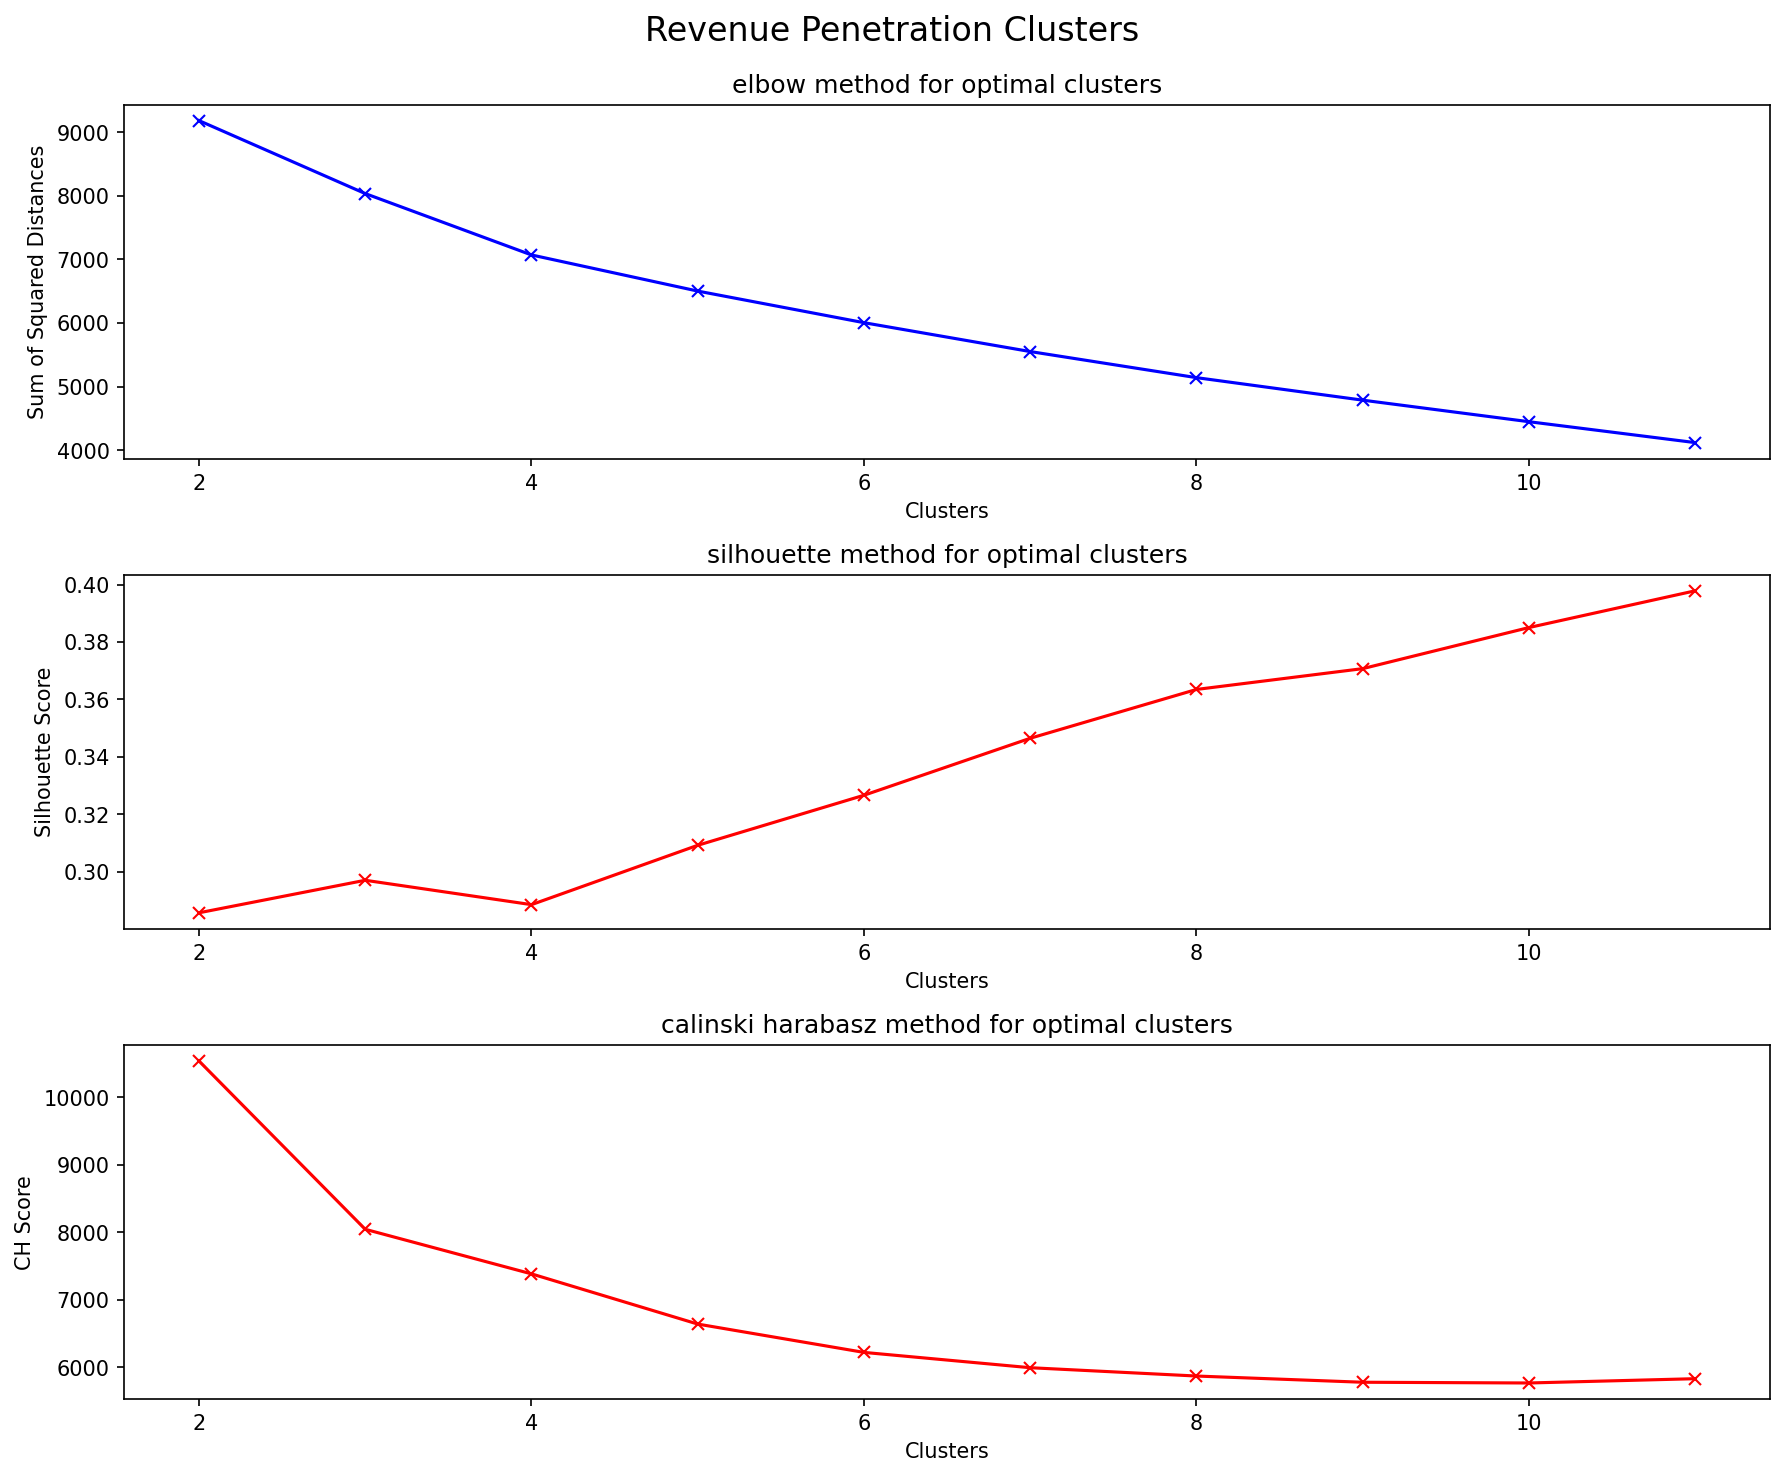

In [12]:
# Visualizing the previous computation
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_rp, 'bx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_rp, 'rx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_rp, 'rx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('Revenue Penetration Clusters', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

# Visit Penetration

In [13]:
sum_of_squared_distances_vp = []
silhouette_scores_vp = []
ch_scores_vp = []
K = range(2,12)
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter = 500, n_init=100, random_state=247)
    model = k_means.fit(kmeans_data_visit_vp)
    sum_of_squared_distances_vp.append(k_means.inertia_)
    labels = k_means.labels_
    silhouette_scores_vp.append(silhouette_score(kmeans_data_visit_vp, labels, metric = 'euclidean'))
    ch_scores_vp.append(calinski_harabasz_score(kmeans_data_visit_vp, labels))

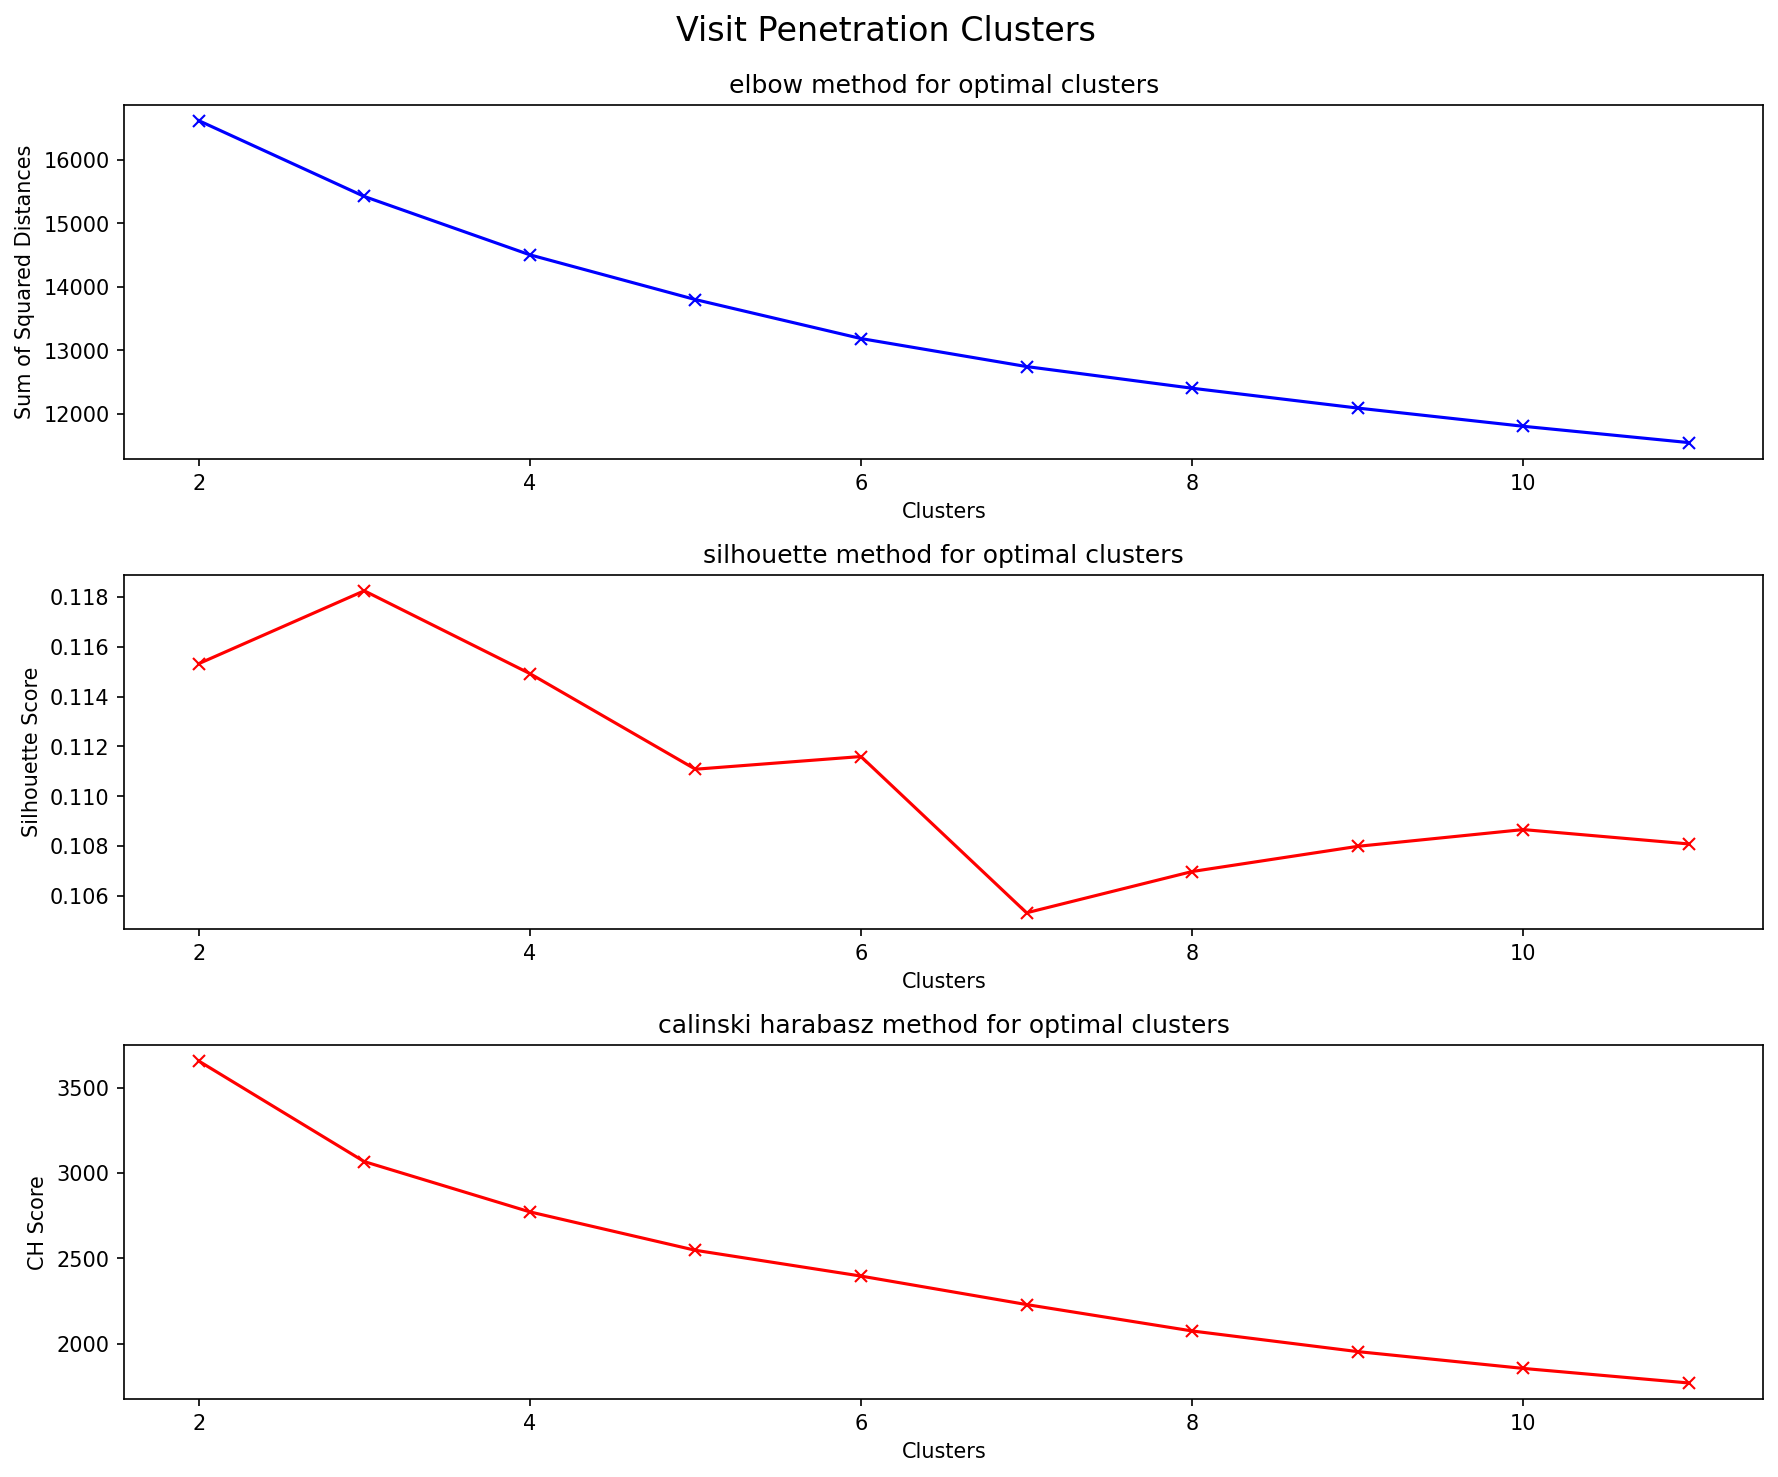

In [14]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_vp, 'bx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_vp, 'rx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_vp, 'rx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('Visit Penetration Clusters', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

# 0.6 VP + 0.4 RP

In [15]:
X64 = (kmeans_data_visit_vp.multiply(0.6) + kmeans_data_visit_rp.multiply(0.4))

In [16]:
sum_of_squared_distances_X64 = []
silhouette_scores_X64 = []
ch_scores_X64 = []
K = range(2,12)
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter = 500, n_init=100, random_state=247)
    model = k_means.fit(X64)
    sum_of_squared_distances_X64.append(k_means.inertia_)
    labels = k_means.labels_
    silhouette_scores_X64.append(silhouette_score(X64, labels, metric = 'euclidean'))
    ch_scores_X64.append(calinski_harabasz_score(X64, labels))

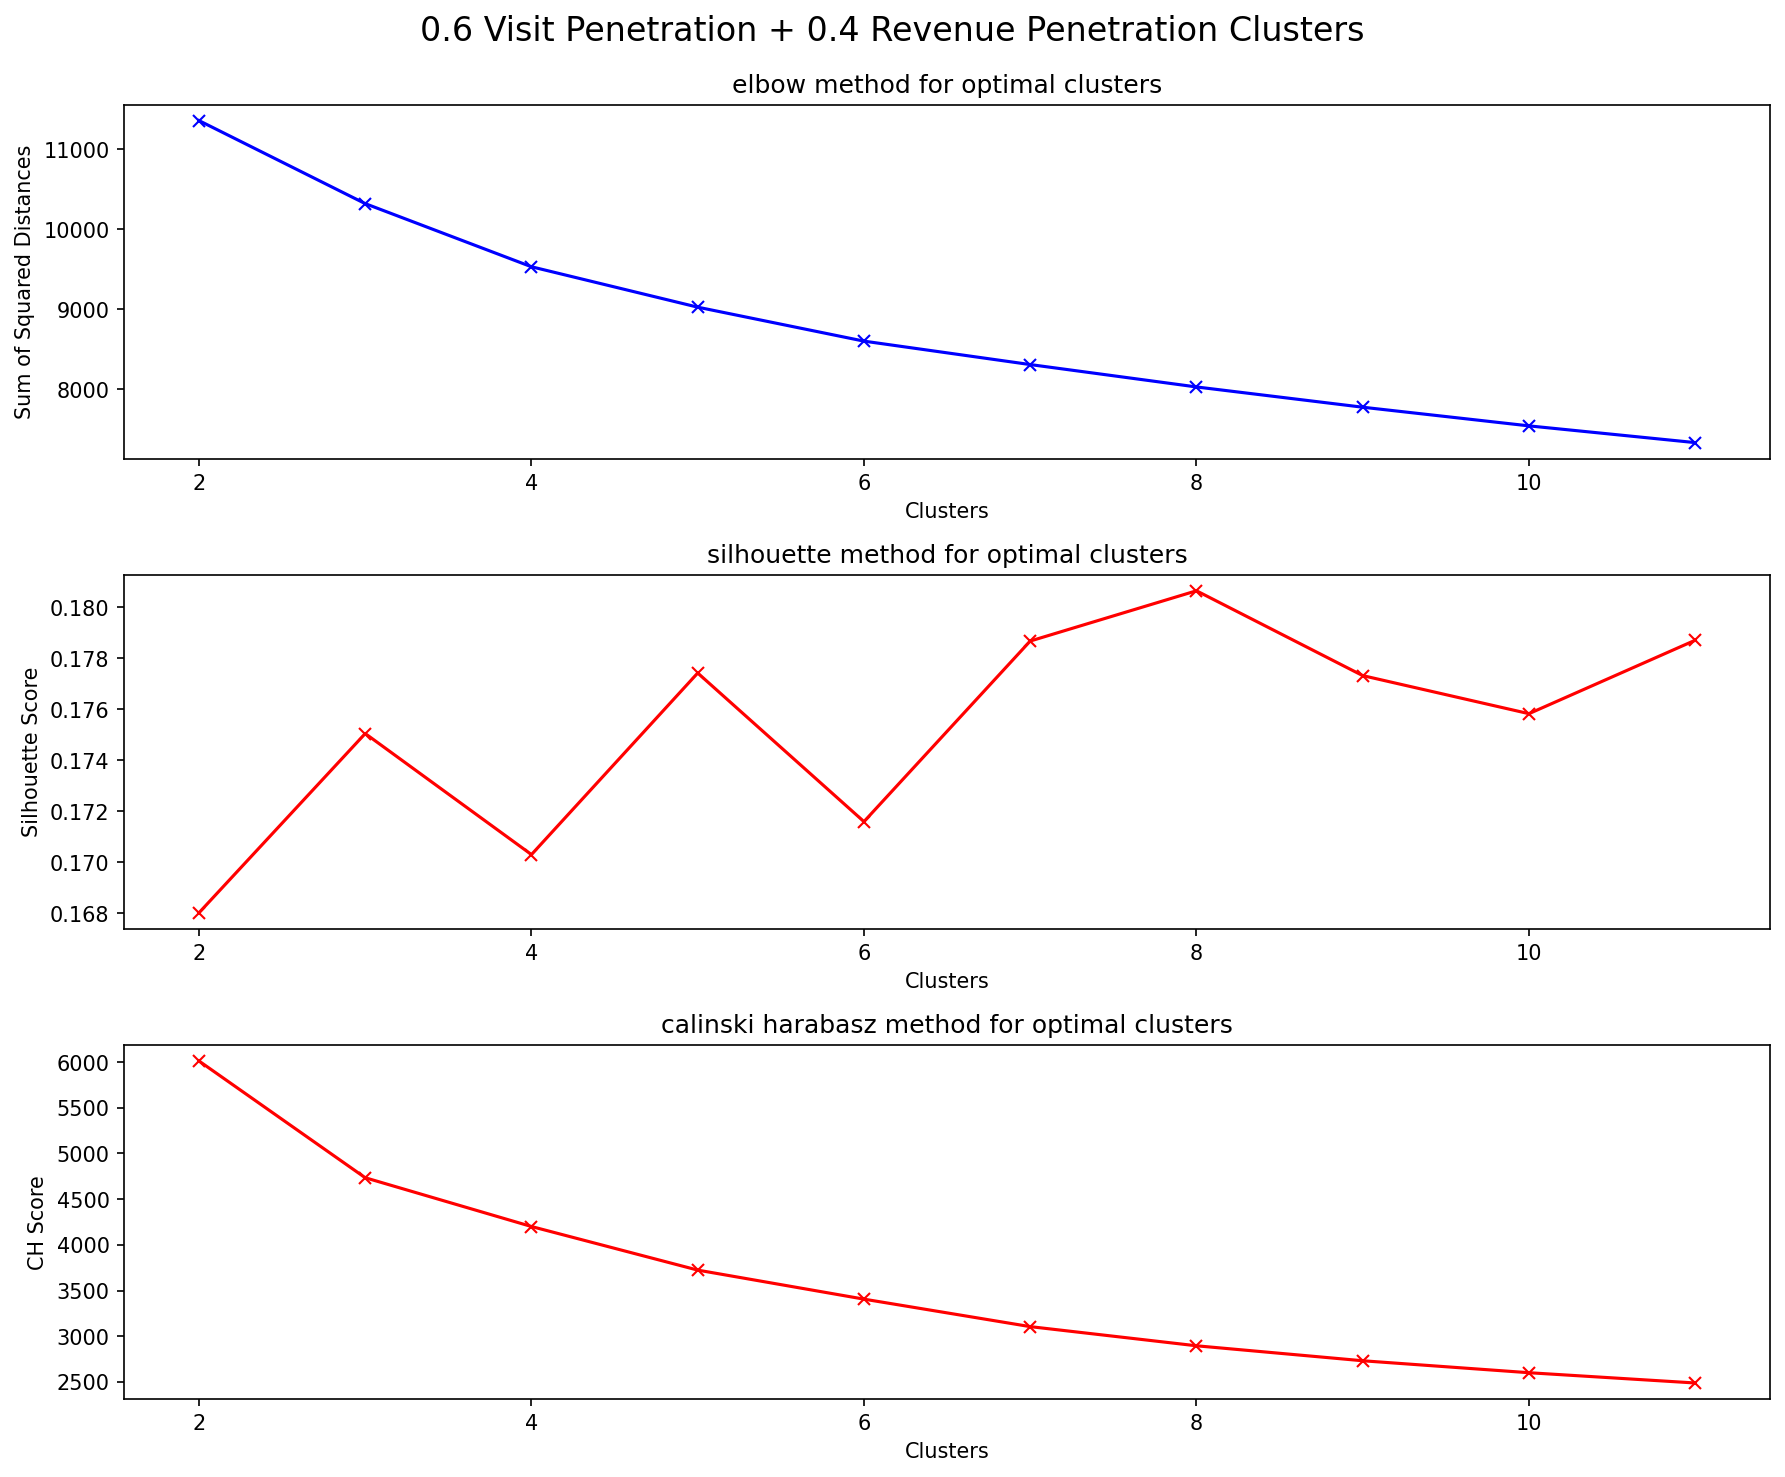

In [17]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_X64, 'bx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_X64, 'rx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_X64, 'rx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('0.6 Visit Penetration + 0.4 Revenue Penetration Clusters', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

# Distinct Article Penetration

In [18]:
sum_of_squared_distances_dmp = []
silhouette_scores_dmp = []
ch_scores_dmp = []
K = range(2,12)
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter = 500, n_init=100, random_state=247)
    model = k_means.fit(kmeans_data_visit_dist_art)
    sum_of_squared_distances_dmp.append(k_means.inertia_)
    labels = k_means.labels_
    silhouette_scores_dmp.append(silhouette_score(kmeans_data_visit_dist_art, labels, metric = 'euclidean'))
    ch_scores_dmp.append(calinski_harabasz_score(kmeans_data_visit_dist_art, labels))

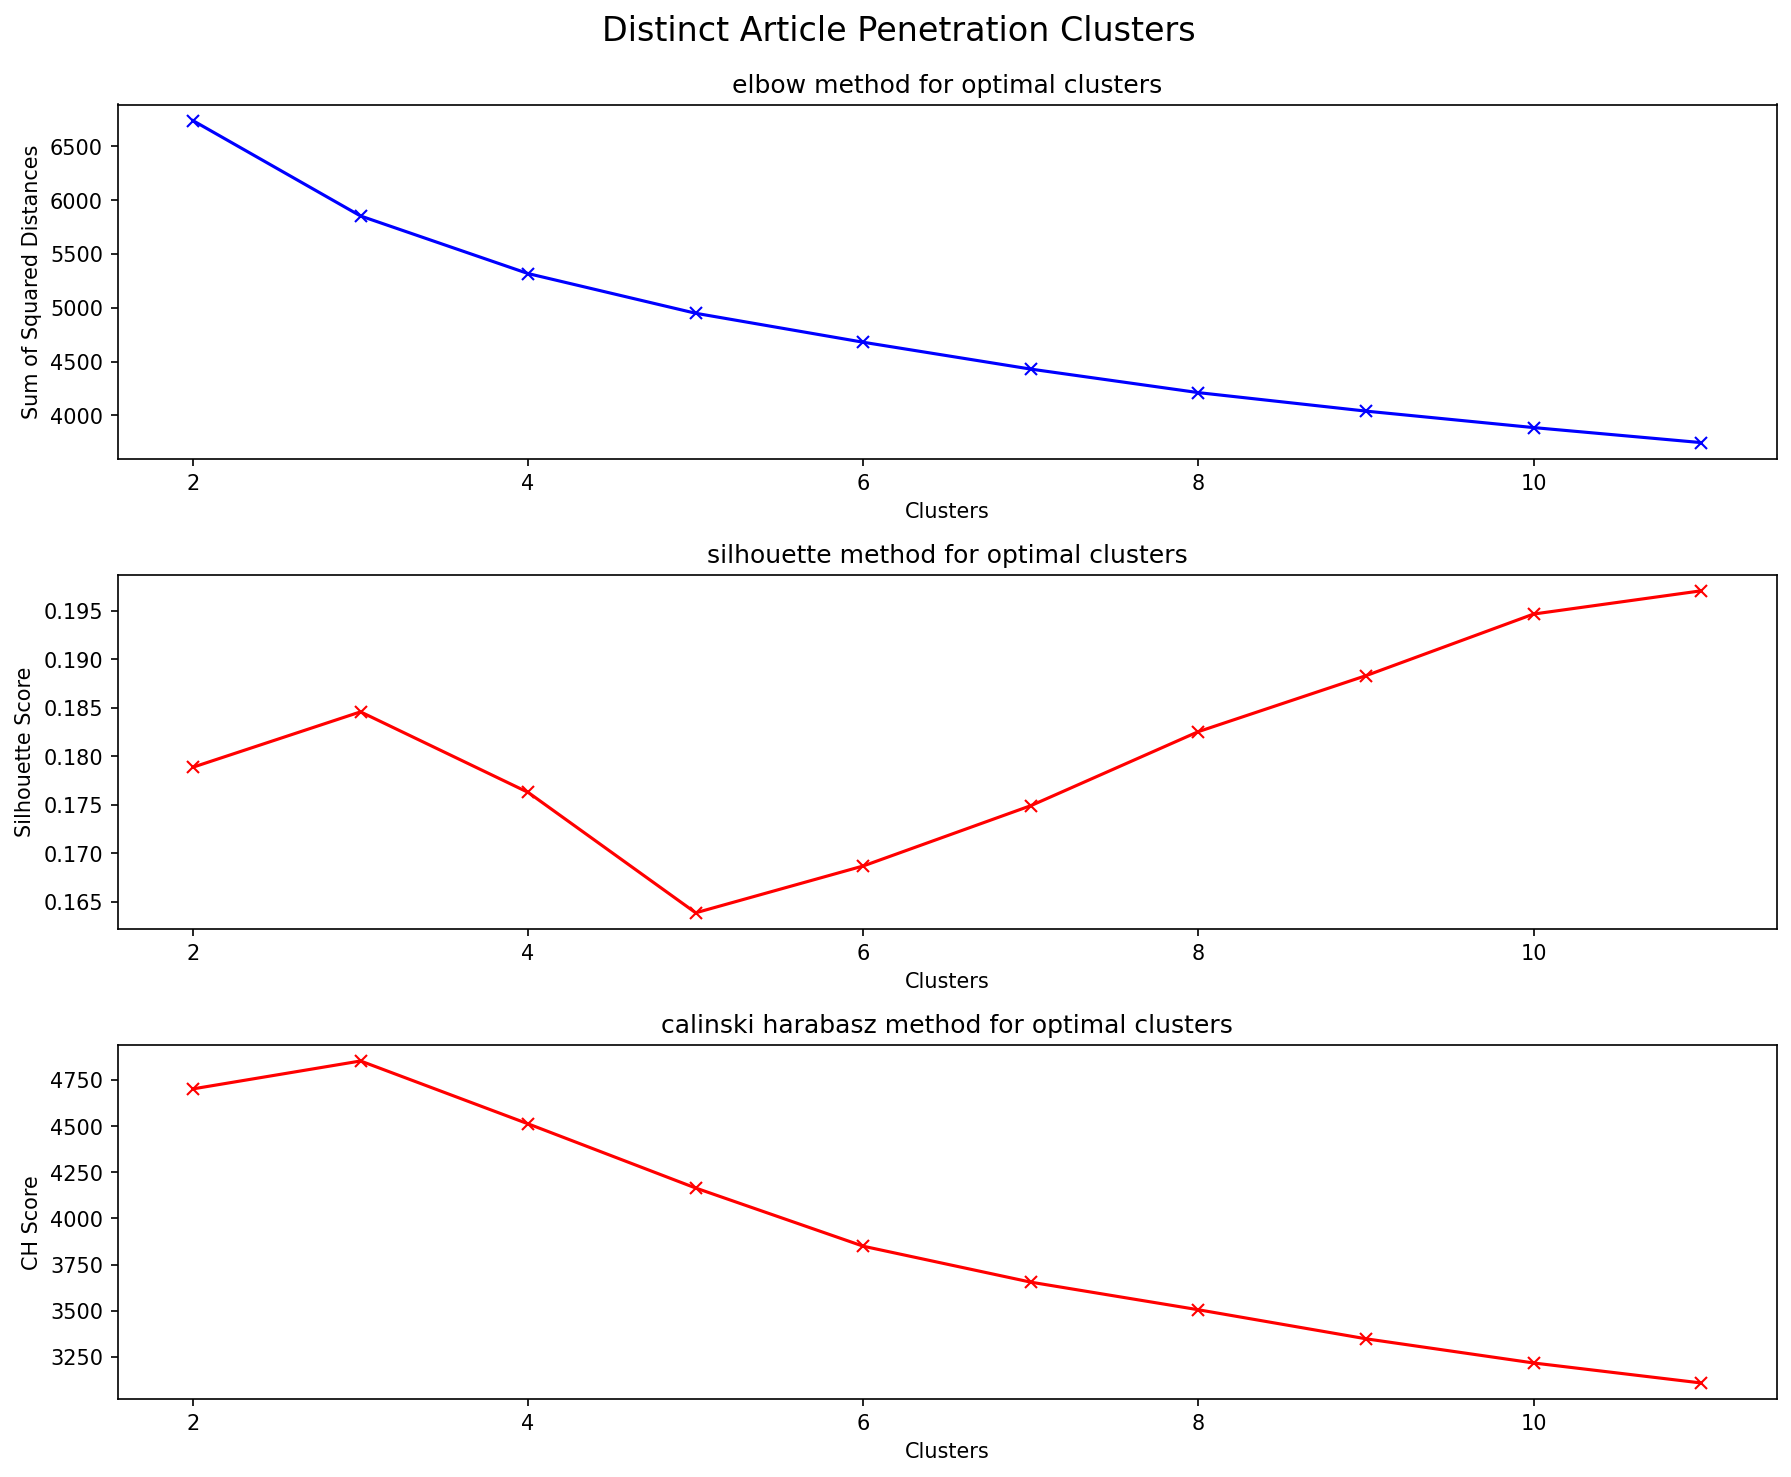

In [19]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_dmp, 'bx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_dmp, 'rx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_dmp, 'rx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('Distinct Article Penetration Clusters', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

# Distinct Sub-Category Penetration

In [20]:
sum_of_squared_distances_dmgp = []
silhouette_scores_dmgp = []
ch_scores_dmgp = []
K = range(2,12)
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter = 500, n_init=100, random_state=247)
    model = k_means.fit(kmeans_data_visit_dist_subcat)
    sum_of_squared_distances_dmgp.append(k_means.inertia_)
    labels = k_means.labels_
    silhouette_scores_dmgp.append(silhouette_score(kmeans_data_visit_dist_subcat, labels, metric = 'euclidean'))
    ch_scores_dmgp.append(calinski_harabasz_score(kmeans_data_visit_dist_subcat, labels))

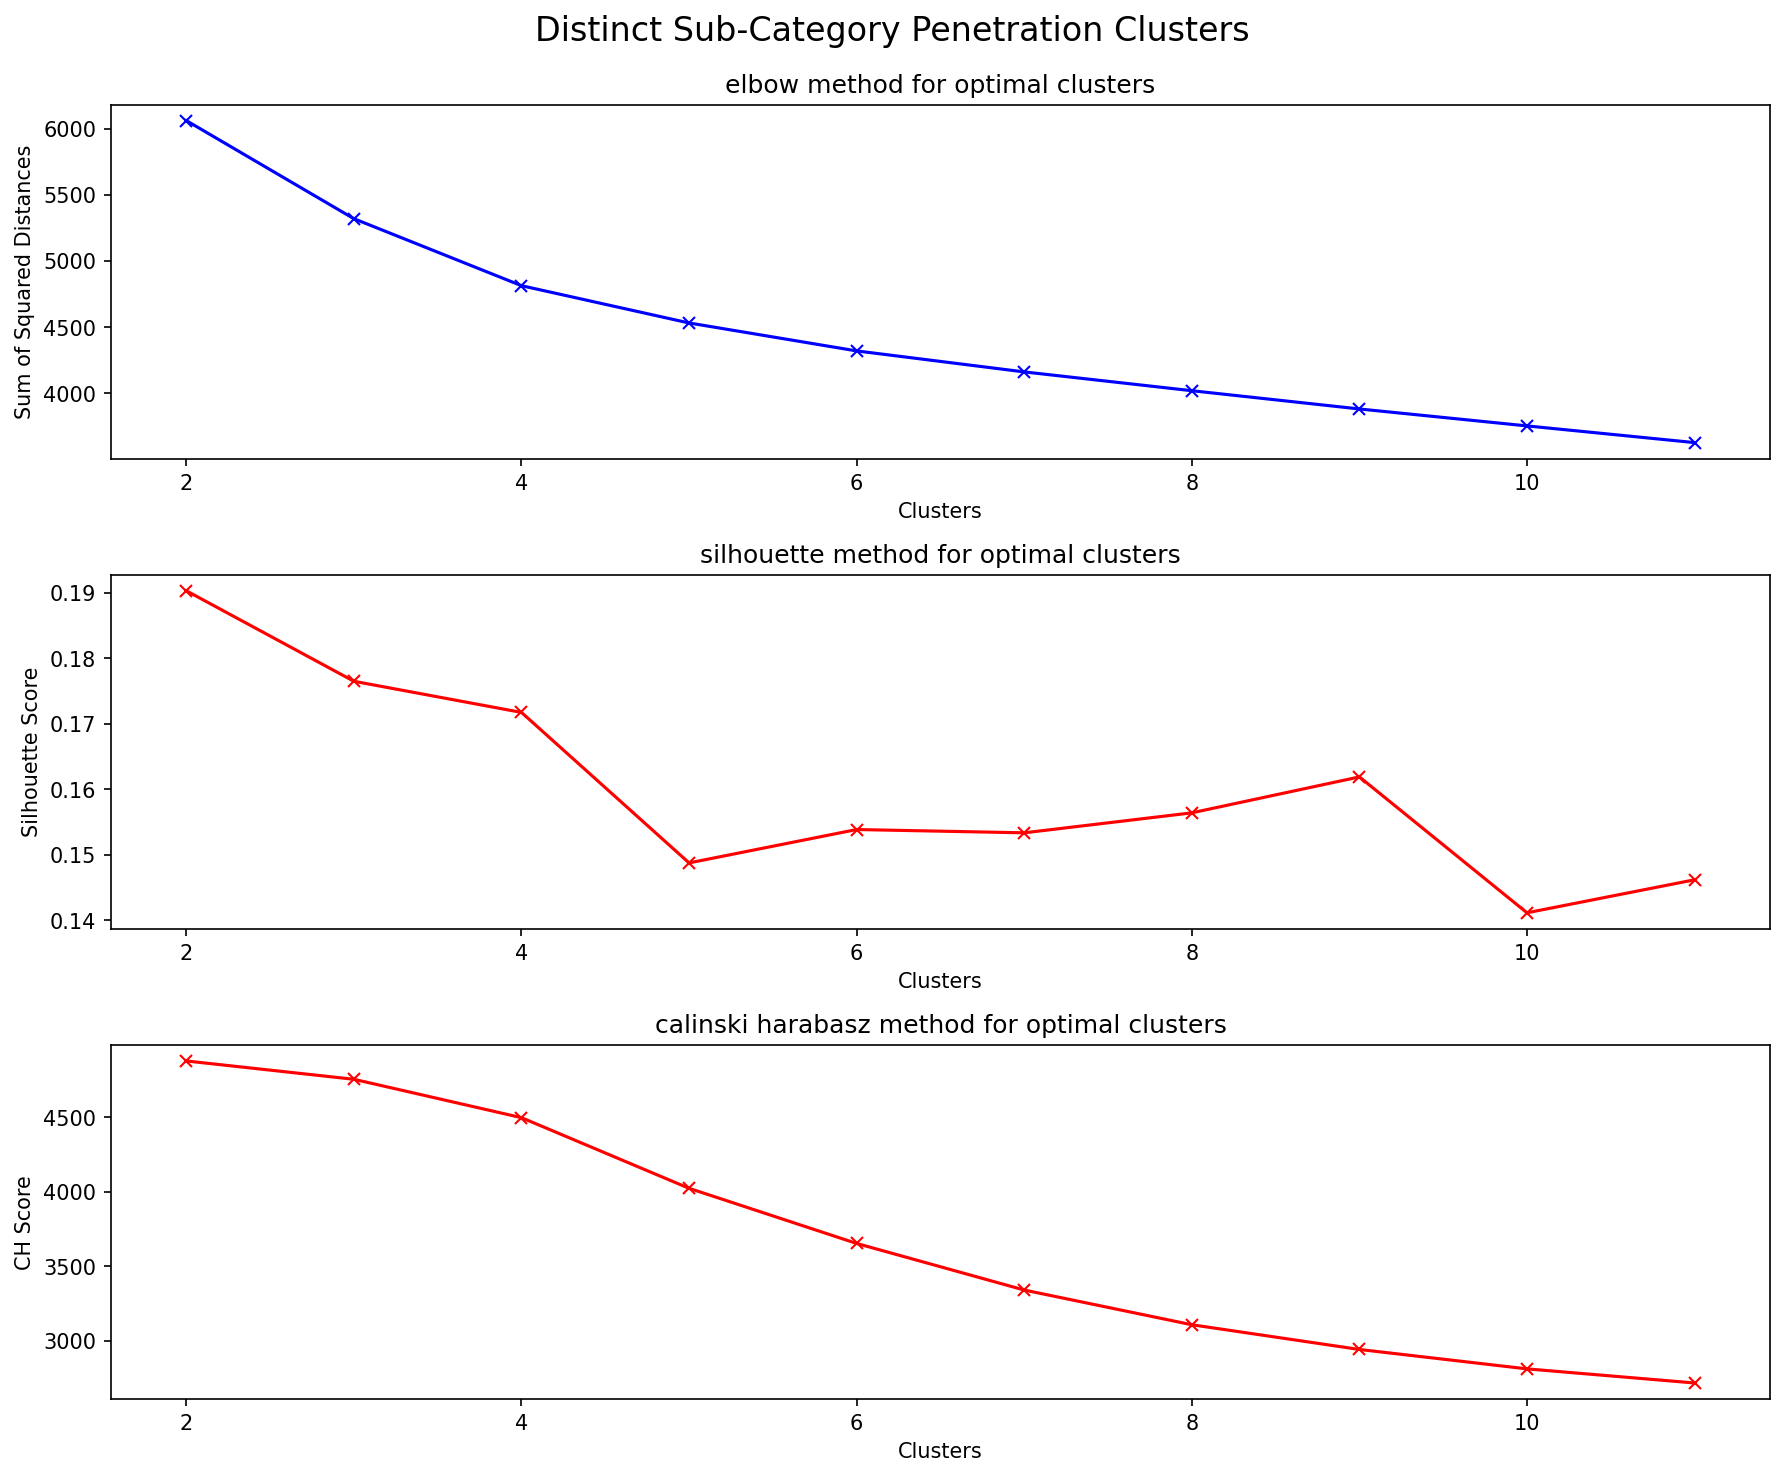

In [21]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_dmgp, 'bx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_dmgp, 'rx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_dmgp, 'rx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('Distinct Sub-Category Penetration Clusters', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

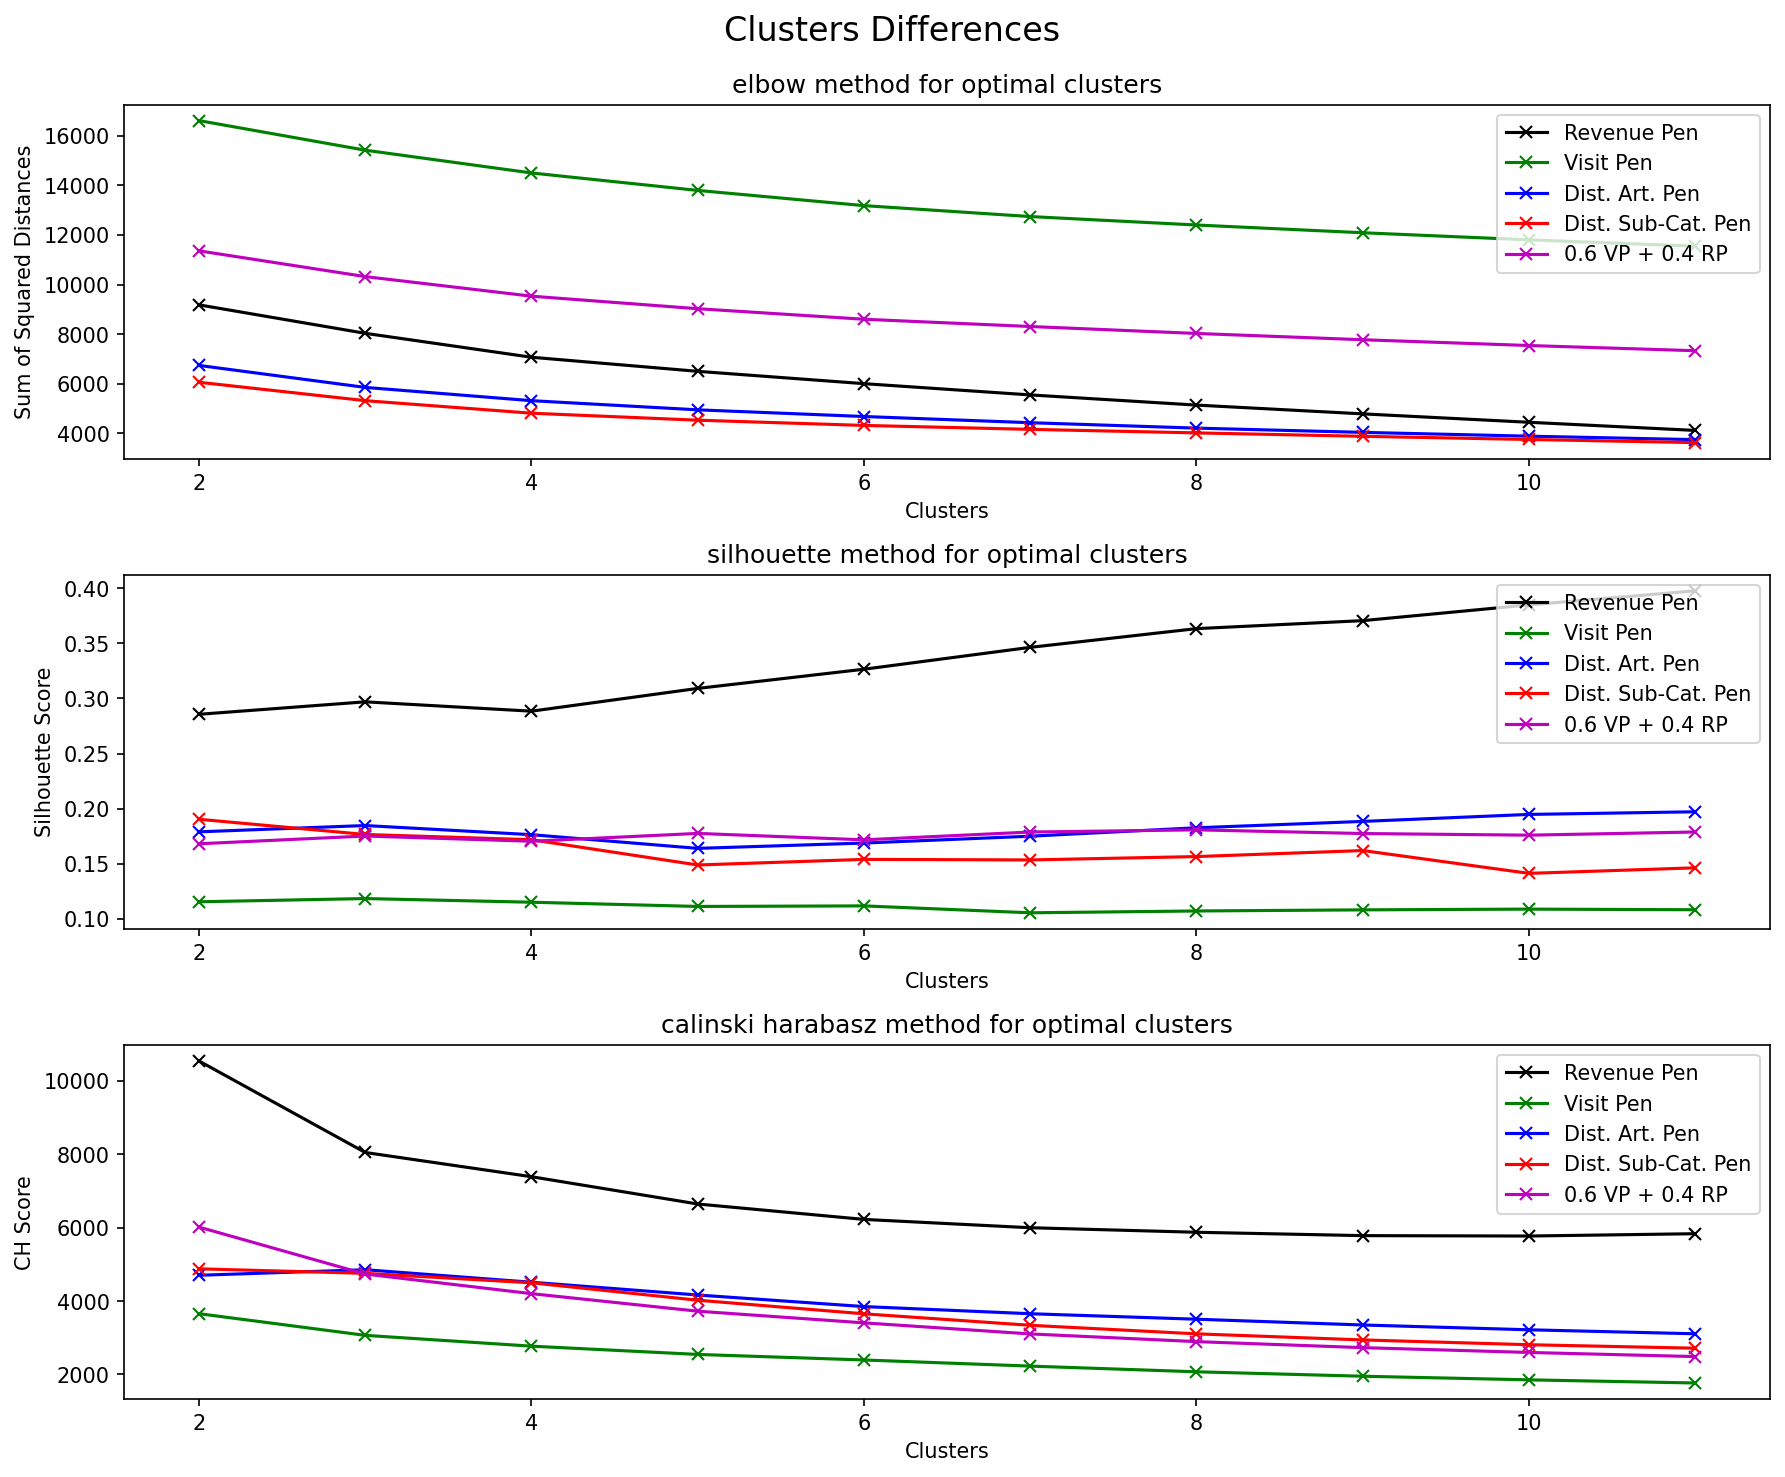

In [22]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_rp, 'kx-',K, sum_of_squared_distances_vp, 'gx-',
         K, sum_of_squared_distances_dmp, 'bx-',K, sum_of_squared_distances_dmgp, 'rx-',
         K, sum_of_squared_distances_X64, 'mx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')
plt.legend(['Revenue Pen', 'Visit Pen', 'Dist. Art. Pen', 'Dist. Sub-Cat. Pen','0.6 VP + 0.4 RP'], loc='upper right')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_rp, 'kx-',K, silhouette_scores_vp, 'gx-',
         K, silhouette_scores_dmp, 'bx-',K, silhouette_scores_dmgp, 'rx-',
         K, silhouette_scores_X64, 'mx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')
plt.legend(['Revenue Pen', 'Visit Pen', 'Dist. Art. Pen', 'Dist. Sub-Cat. Pen','0.6 VP + 0.4 RP'], loc='upper right')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_rp, 'kx-',K, ch_scores_vp, 'gx-',K, ch_scores_dmp, 'bx-',
         K, ch_scores_dmgp, 'rx-',K, ch_scores_X64, 'mx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('Clusters Differences', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.legend(['Revenue Pen', 'Visit Pen', 'Dist. Art. Pen', 'Dist. Sub-Cat. Pen','0.6 VP + 0.4 RP'], loc='upper right')
plt.show()

# 0.4 VP + 0.6 RP

In [23]:
X46 = (kmeans_data_visit_vp.multiply(0.4) + kmeans_data_visit_rp.multiply(0.6))

In [24]:
sum_of_squared_distances_X46 = []
silhouette_scores_X46 = []
ch_scores_X46 = []
K = range(2,12)
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter = 500, n_init=100, random_state=247)
    model = k_means.fit(X46)
    sum_of_squared_distances_X46.append(k_means.inertia_)
    labels = k_means.labels_
    silhouette_scores_X46.append(silhouette_score(X46, labels, metric = 'euclidean'))
    ch_scores_X46.append(calinski_harabasz_score(X46, labels))

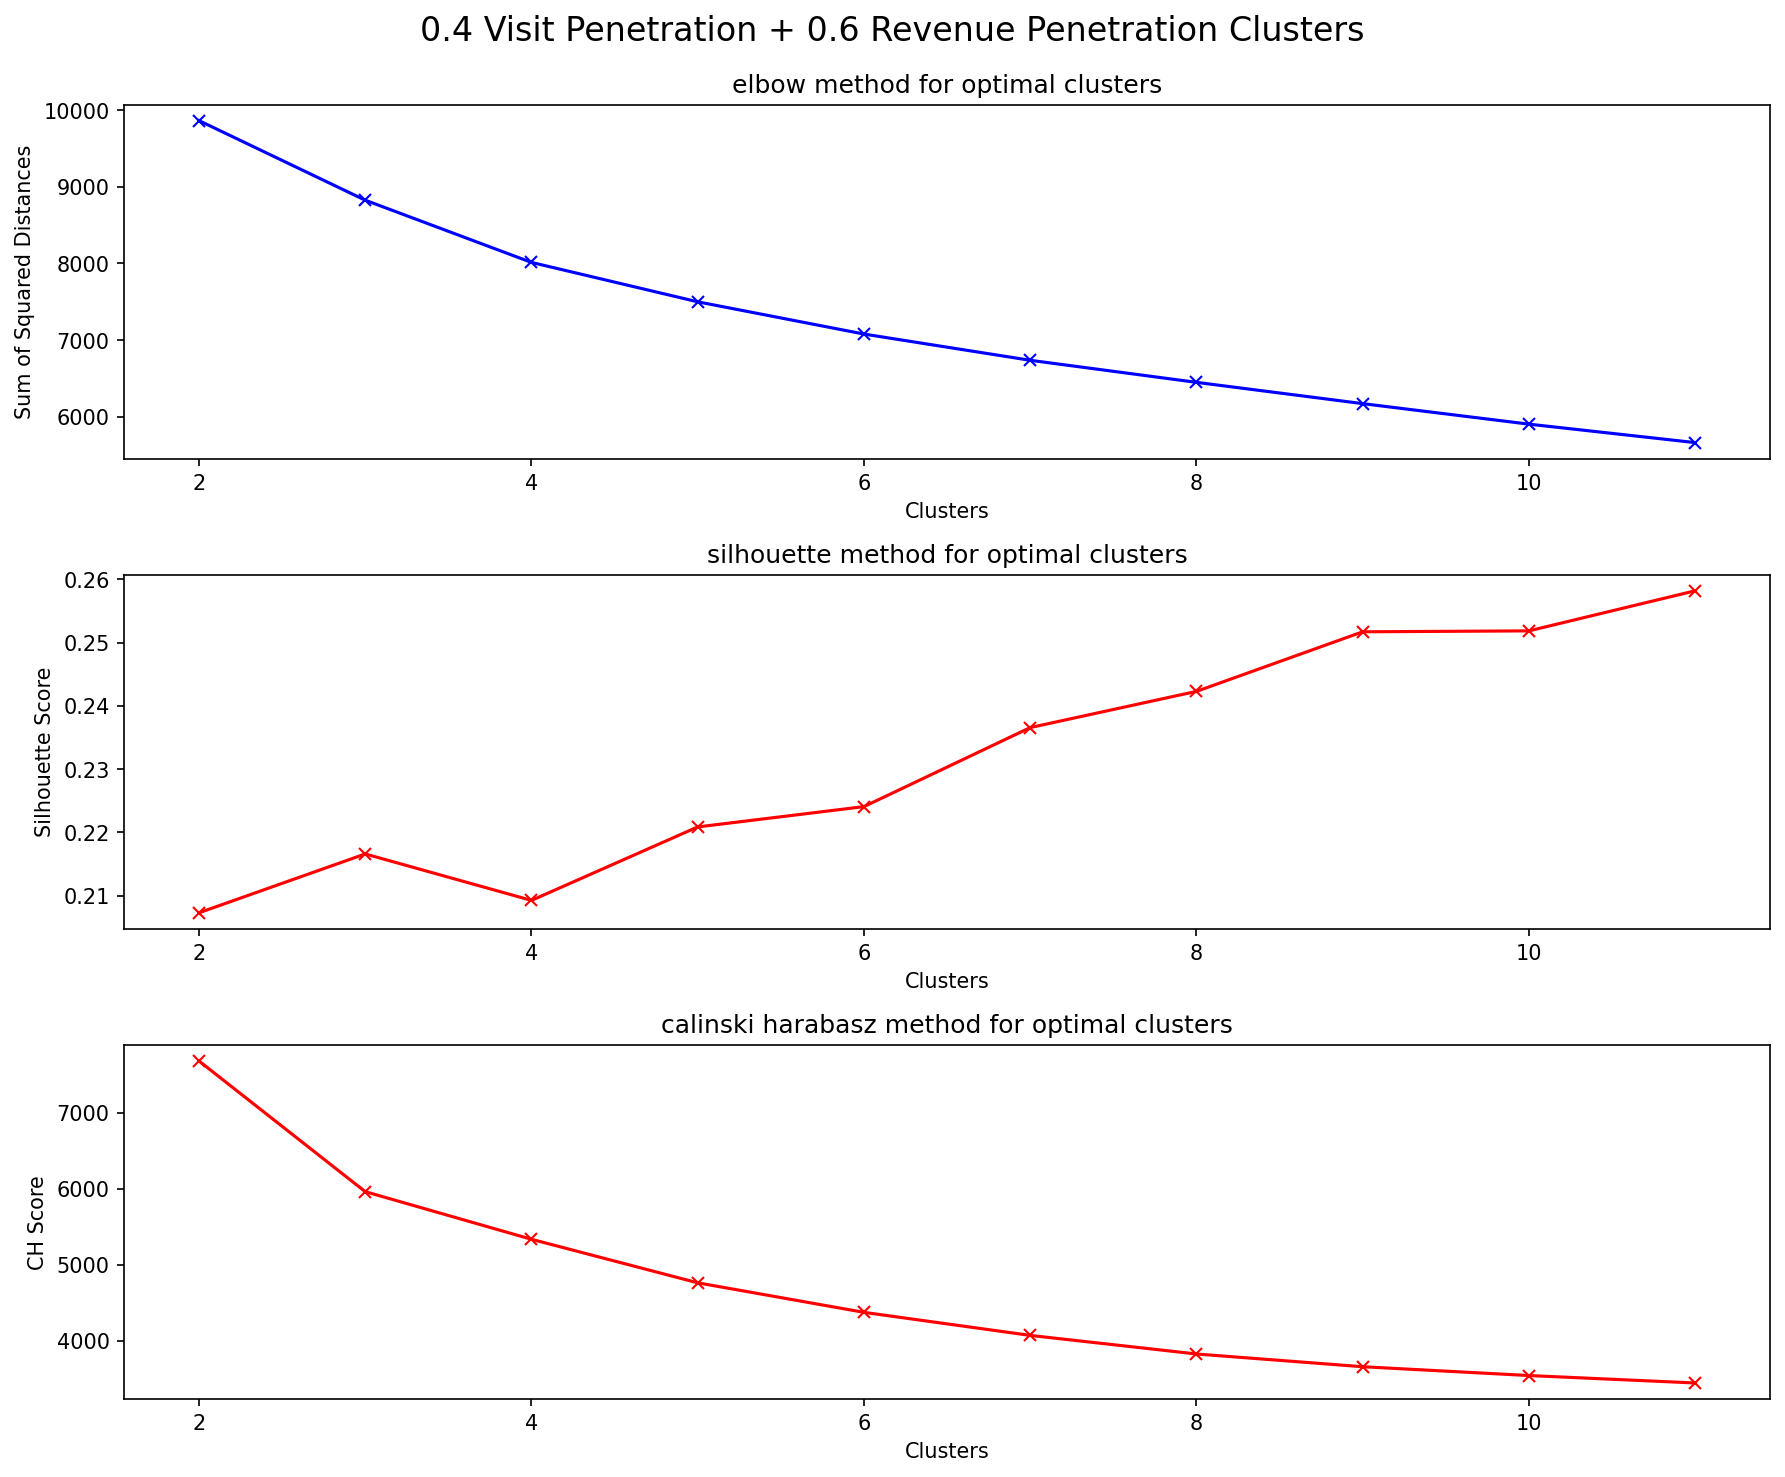

In [25]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_X46, 'bx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_X46, 'rx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_X46, 'rx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('0.4 Visit Penetration + 0.6 Revenue Penetration Clusters', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

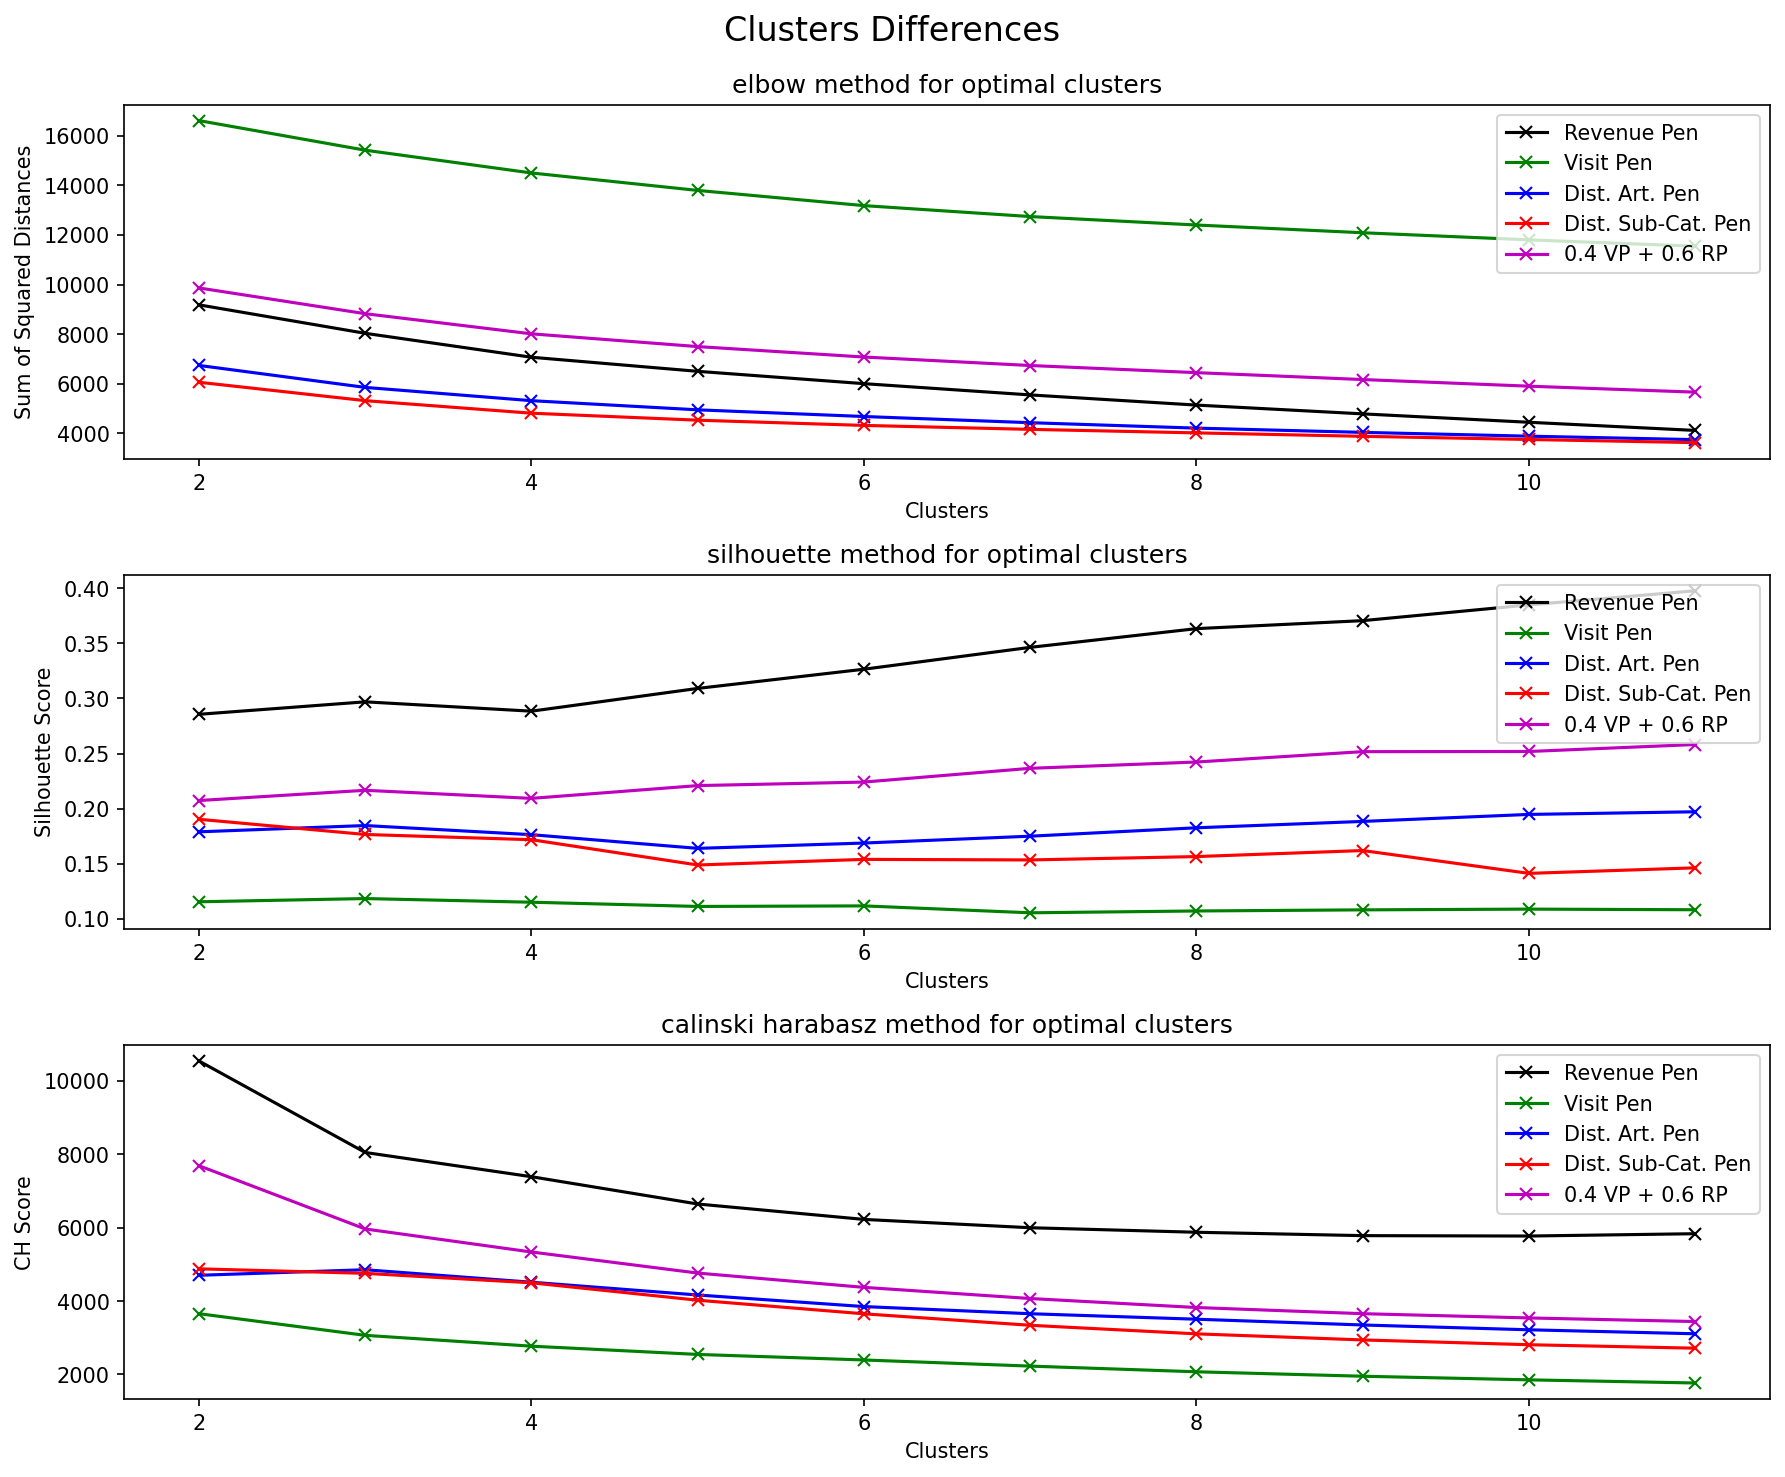

In [26]:
fig = plt.figure(figsize=(12, 10), dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot(K, sum_of_squared_distances_rp, 'kx-',K, sum_of_squared_distances_vp, 'gx-',
         K, sum_of_squared_distances_dmp, 'bx-',K, sum_of_squared_distances_dmgp, 'rx-',
         K, sum_of_squared_distances_X46, 'mx-')
ax1.set_title('elbow method for optimal clusters')
ax1.set(xlabel='Clusters', ylabel='Sum of Squared Distances')
plt.legend(['Revenue Pen', 'Visit Pen', 'Dist. Art. Pen', 'Dist. Sub-Cat. Pen','0.4 VP + 0.6 RP'], loc='upper right')

ax2 = fig.add_subplot(312)
ax2.plot(K, silhouette_scores_rp, 'kx-',K, silhouette_scores_vp, 'gx-',
         K, silhouette_scores_dmp, 'bx-',K, silhouette_scores_dmgp, 'rx-',
         K, silhouette_scores_X46, 'mx-')
ax2.set_title('silhouette method for optimal clusters')
ax2.set(xlabel='Clusters', ylabel='Silhouette Score')
plt.legend(['Revenue Pen', 'Visit Pen', 'Dist. Art. Pen', 'Dist. Sub-Cat. Pen','0.4 VP + 0.6 RP'], loc='upper right')

ax3 = fig.add_subplot(313)
ax3.plot(K, ch_scores_rp, 'kx-',K, ch_scores_vp, 'gx-',K, ch_scores_dmp, 'bx-',
         K, ch_scores_dmgp, 'rx-',K, ch_scores_X46, 'mx-')
ax3.set_title('calinski harabasz method for optimal clusters')
ax3.set(xlabel='Clusters', ylabel='CH Score')
fig.suptitle('Clusters Differences', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.legend(['Revenue Pen', 'Visit Pen', 'Dist. Art. Pen', 'Dist. Sub-Cat. Pen','0.4 VP + 0.6 RP'], loc='upper right')
plt.show()

### <span style="color: #464242; font-family: Trebuchet MS; font-size: 1.4em;"> 0.4 VP + 0.6 RP - 5 CL </span>

In [27]:
kmeans_data_visit_x46_cl5 = (kmeans_data_visit_vp.multiply(0.4) + kmeans_data_visit_rp.multiply(0.6))

In [28]:
kmeans_visit_x46_cl5 = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=500, random_state=247)
pred_y = kmeans_visit_x46_cl5.fit_predict(kmeans_data_visit_x46_cl5)

In [29]:
labels = kmeans_visit_x46_cl5.labels_
s_score = silhouette_score(kmeans_data_visit_x46_cl5, labels, metric = 'euclidean')
ch_score = calinski_harabasz_score(kmeans_data_visit_x46_cl5, labels)
print(f'silhouette_score :{s_score:.3f}')
print(f'calinski_harabasz_score :{ch_score:,.2f}')

silhouette_score :0.221
calinski_harabasz_score :4,761.03


In [30]:
kmeans_data_visit_x46_cl5 = kmeans_data_visit_x46_cl5.reset_index()
kmeans_data_visit_x46_cl5["cluster_1"] = pred_y

In [31]:
df = pd.concat([kmeans_data_visit_x46_cl5.groupby(["cluster_1"])["CUSTOMER_ID"].nunique(),\
           kmeans_data_visit_x46_cl5.groupby(["cluster_1"])["CUSTOMER_ID"].nunique()/\
           kmeans_data_visit_x46_cl5["CUSTOMER_ID"].nunique()],axis=1)

df.columns=['Customer (#)', 'Customer (%)']
df.style.background_gradient(axis=0, cmap='YlOrRd').format('{:,.2f}')

,Customer (#),Customer (%)
cluster_1,,
0,"5,522.00",0.24
1,"3,653.00",0.16
2,"2,351.00",0.10
3,"10,012.00",0.43
4,"1,893.00",0.08


In [32]:
kmeans_data_visit_x46_cl5 = kmeans_data_visit_x46_cl5.merge(data_f[["VISIT_COUNT","REVENUE"]].reset_index(), how = 'left', on = 'CUSTOMER_ID')

In [33]:
df_1 = kmeans_data_visit_x46_cl5.groupby("cluster_1")\
        .agg({"CUSTOMER_ID":'nunique',"VISIT_COUNT":'sum',"REVENUE":'sum'})

df_1.columns = ['Customer (#)', 'Visit (#)', 'Revenue']
df_1.style.background_gradient(axis=0, cmap='YlOrRd').format('{:,.0f}')

,Customer (#),Visit (#),Revenue
cluster_1,,,
0,"5,522","47,788,188","57,552,439,635"
1,"3,653","19,628,685","23,638,373,010"
2,"2,351","9,998,321","12,032,302,120"
3,"10,012","31,633,140","38,063,671,985"
4,"1,893","8,588,040","10,346,080,896"


In [34]:
df_2 = kmeans_data_visit_x46_cl5.drop(columns = ['CUSTOMER_ID','VISIT_COUNT','REVENUE'])
df_2 = pd.DataFrame(df_2.groupby(["cluster_1"]).aggregate("mean"))

In [35]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
df_2.style.background_gradient(axis=0, cmap=cm).format('{:,.2f}')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19
cluster_1,,,,,,,,,,,,,,,,,,,
0,0.03,0.05,0.05,0.03,0.15,0.05,0.03,0.03,0.02,0.02,0.03,0.02,0.01,0.01,0.74,0.01,0.00,0.01,0.00
1,0.05,0.05,0.06,0.06,0.06,0.09,0.07,0.02,0.55,0.03,0.04,0.15,0.21,0.02,0.04,0.02,0.04,0.02,0.02
2,0.03,0.05,0.04,0.03,0.09,0.10,0.02,0.02,0.02,0.03,0.73,0.03,0.02,0.01,0.04,0.00,0.01,0.01,0.02
3,0.05,0.09,0.10,0.08,0.17,0.10,0.10,0.06,0.05,0.06,0.05,0.07,0.06,0.04,0.06,0.06,0.01,0.06,0.11
4,0.03,0.03,0.05,0.03,0.07,0.20,0.04,0.01,0.13,0.02,0.06,0.06,0.06,0.01,0.03,0.01,0.57,0.02,0.06


In [36]:
#kmeans_data_visit_x46_cl5[["CUSTOMER_ID","cluster_1"]].to_csv('kmeans_data_visit_x46_cl8.csv', index = False)

In [37]:
#kmeans_visit_x46_cl5.cluster_centers_

### <span style="color: #464242; font-family: Trebuchet MS; font-size: 1.4em;">0.4 VP + 0.6 RP - 7 CL</span>

In [38]:
kmeans_data_visit_x46_cl7 = (kmeans_data_visit_vp.multiply(0.4) + kmeans_data_visit_rp.multiply(0.6))

In [39]:
kmeans_visit_x46_cl7 = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=500, random_state=247)
pred_y = kmeans_visit_x46_cl7.fit_predict(kmeans_data_visit_x46_cl7)

In [40]:
labels = kmeans_visit_x46_cl7.labels_
s_score = silhouette_score(kmeans_data_visit_x46_cl7, labels, metric = 'euclidean')
ch_score = calinski_harabasz_score(kmeans_data_visit_x46_cl7, labels)
print(f'silhouette_score :{s_score:.3f}')
print(f'calinski_harabasz_score :{ch_score:,.2f}')

silhouette_score :0.237
calinski_harabasz_score :4,068.45


In [41]:
kmeans_data_visit_x46_cl7 = kmeans_data_visit_x46_cl7.reset_index()
kmeans_data_visit_x46_cl7["cluster_1"] = pred_y

In [42]:
df = pd.concat([kmeans_data_visit_x46_cl7.groupby(["cluster_1"])["CUSTOMER_ID"].nunique(),\
           kmeans_data_visit_x46_cl7.groupby(["cluster_1"])["CUSTOMER_ID"].nunique()/\
           kmeans_data_visit_x46_cl7["CUSTOMER_ID"].nunique()],axis=1)

df.columns=['Customer (#)', 'Customer (%)']
df.style.background_gradient(axis=0, cmap='YlOrRd').format('{:,.2f}')

,Customer (#),Customer (%)
cluster_1,,
0,"1,521.00",0.06
1,"5,322.00",0.23
2,"3,474.00",0.15
3,"8,121.00",0.35
4,"2,286.00",0.10
5,893.00,0.04
6,"1,816.00",0.08


In [43]:
kmeans_data_visit_x46_cl7 = kmeans_data_visit_x46_cl7.merge(data_f[["VISIT_COUNT","REVENUE"]].reset_index(), how = 'left', on = 'CUSTOMER_ID')

In [44]:
df_1 = kmeans_data_visit_x46_cl7.groupby("cluster_1")\
        .agg({"CUSTOMER_ID":'nunique',"VISIT_COUNT":'sum',"REVENUE":'sum'})

df_1.columns = ['Customer (#)', 'Visit (#)', 'Revenue']
df_1.style.background_gradient(axis=0, cmap='YlOrRd').format('{:,.0f}')

,Customer (#),Visit (#),Revenue
cluster_1,,,
0,"1,521","6,549,717","7,884,071,572"
1,"5,322","46,378,332","55,854,745,549"
2,"3,474","18,671,997","22,486,543,016"
3,"8,121","22,358,223","26,896,829,078"
4,"2,286","9,687,497","11,657,946,526"
5,893,"5,785,100","6,967,398,224"
6,"1,816","8,205,508","9,885,333,681"


In [45]:
df_2 = kmeans_data_visit_x46_cl7.drop(columns = ['CUSTOMER_ID','VISIT_COUNT','REVENUE'])
df_2 = pd.DataFrame(df_2.groupby(["cluster_1"]).aggregate("mean"))
df_2.style.background_gradient(axis=0, cmap=cm).format('{:,.2f}')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19
cluster_1,,,,,,,,,,,,,,,,,,,
0,0.03,0.06,0.08,0.02,0.67,0.06,0.03,0.02,0.02,0.03,0.03,0.04,0.02,0.01,0.14,0.01,0.00,0.01,0.00
1,0.03,0.05,0.05,0.03,0.14,0.05,0.03,0.03,0.02,0.02,0.03,0.02,0.01,0.01,0.75,0.01,0.00,0.01,0.00
2,0.05,0.05,0.06,0.06,0.06,0.09,0.07,0.02,0.56,0.03,0.04,0.14,0.22,0.02,0.04,0.02,0.04,0.02,0.01
3,0.06,0.10,0.11,0.10,0.08,0.12,0.12,0.08,0.06,0.07,0.06,0.08,0.08,0.05,0.06,0.08,0.01,0.08,0.02
4,0.03,0.05,0.04,0.03,0.08,0.10,0.02,0.02,0.02,0.03,0.74,0.03,0.02,0.01,0.04,0.00,0.01,0.01,0.01
5,0.03,0.04,0.04,0.03,0.06,0.10,0.06,0.02,0.08,0.03,0.08,0.04,0.04,0.01,0.05,0.02,0.04,0.03,0.62
6,0.03,0.03,0.05,0.03,0.07,0.20,0.04,0.01,0.13,0.02,0.06,0.06,0.06,0.01,0.03,0.01,0.58,0.02,0.04


In [46]:
#kmeans_data_visit_x46_cl7[["CUSTOMER_ID","cluster_1"]].to_csv('kmeans_data_visit_x46_cl7.csv', index = False)

In [47]:
#kmeans_visit_x46_cl7.cluster_centers_

### <span style="color: #464242; font-family: Trebuchet MS; font-size: 1.4em;">0.6 VP + 0.4 RP - 7 CL</span>

In [48]:
kmeans_data_visit_x64_cl7 = (kmeans_data_visit_vp.multiply(0.6) + kmeans_data_visit_rp.multiply(0.4))

In [49]:
kmeans_visit_x64_cl7 = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=500, random_state=247)
pred_y = kmeans_visit_x64_cl7.fit_predict(kmeans_data_visit_x64_cl7)

In [50]:
labels = kmeans_visit_x64_cl7.labels_
s_score = silhouette_score(kmeans_data_visit_x64_cl7, labels, metric = 'euclidean')
ch_score = calinski_harabasz_score(kmeans_data_visit_x64_cl7, labels)
print(f'silhouette_score :{s_score:.3f}')
print(f'calinski_harabasz_score :{ch_score:,.2f}')

silhouette_score :0.179
calinski_harabasz_score :3,104.63


In [51]:
kmeans_data_visit_x64_cl7 = kmeans_data_visit_x64_cl7.reset_index()
kmeans_data_visit_x64_cl7["cluster_1"] = pred_y

In [52]:
df = pd.concat([kmeans_data_visit_x64_cl7.groupby(["cluster_1"])["CUSTOMER_ID"].nunique(),\
           kmeans_data_visit_x64_cl7.groupby(["cluster_1"])["CUSTOMER_ID"].nunique()/\
           kmeans_data_visit_x64_cl7["CUSTOMER_ID"].nunique()],axis=1)

df.columns=['Customer (#)', 'Customer (%)']
df.style.background_gradient(axis=0, cmap='YlOrRd').format('{:,.2f}')

,Customer (#),Customer (%)
cluster_1,,
0,"1,973.00",0.08
1,"5,007.00",0.21
2,"2,124.00",0.09
3,875.00,0.04
4,"7,395.00",0.32
5,"3,578.00",0.15
6,"2,481.00",0.11


In [53]:
kmeans_data_visit_x64_cl7 = kmeans_data_visit_x64_cl7.merge(data_f[["VISIT_COUNT","REVENUE"]].reset_index(), how = 'left', on = 'CUSTOMER_ID')

In [54]:
df_1 = kmeans_data_visit_x64_cl7.groupby("cluster_1")\
        .agg({"CUSTOMER_ID":'nunique',"VISIT_COUNT":'sum',"REVENUE":'sum'})

df_1.columns = ['Customer (#)', 'Visit (#)', 'Revenue']
df_1.style.background_gradient(axis=0, cmap='YlOrRd').format('{:,.0f}')

,Customer (#),Visit (#),Revenue
cluster_1,,,
0,"1,973","8,445,601","10,174,228,560"
1,"5,007","43,653,720","52,574,379,573"
2,"2,124","9,896,676","11,913,036,766"
3,875,"5,521,894","6,650,463,630"
4,"7,395","20,109,281","24,189,582,122"
5,"3,578","19,412,785","23,378,899,077"
6,"2,481","10,596,417","12,752,277,918"


In [55]:
df_2 = kmeans_data_visit_x64_cl7.drop(columns = ['CUSTOMER_ID','VISIT_COUNT','REVENUE'])
df_2 = pd.DataFrame(df_2.groupby(["cluster_1"]).aggregate("mean"))
df_2.style.background_gradient(axis=0, cmap=cm).format('{:,.2f}')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19
cluster_1,,,,,,,,,,,,,,,,,,,
0,0.03,0.04,0.06,0.05,0.10,0.29,0.05,0.02,0.14,0.03,0.07,0.08,0.07,0.02,0.04,0.01,0.56,0.02,0.04
1,0.04,0.07,0.07,0.04,0.18,0.06,0.04,0.04,0.03,0.02,0.04,0.02,0.02,0.01,0.72,0.01,0.00,0.01,0.00
2,0.05,0.10,0.12,0.04,0.61,0.10,0.05,0.04,0.04,0.03,0.05,0.05,0.03,0.01,0.23,0.02,0.01,0.02,0.01
3,0.05,0.07,0.05,0.04,0.08,0.13,0.07,0.02,0.09,0.04,0.09,0.04,0.04,0.01,0.06,0.02,0.05,0.04,0.59
4,0.09,0.13,0.15,0.13,0.09,0.13,0.13,0.10,0.07,0.08,0.07,0.10,0.08,0.06,0.08,0.08,0.01,0.08,0.01
5,0.07,0.07,0.09,0.08,0.08,0.12,0.09,0.03,0.55,0.04,0.05,0.20,0.25,0.02,0.04,0.03,0.05,0.02,0.02
6,0.04,0.06,0.06,0.04,0.11,0.14,0.03,0.02,0.03,0.04,0.71,0.04,0.03,0.01,0.05,0.00,0.01,0.01,0.01


In [56]:
#kmeans_data_visit_x64_cl7[["CUSTOMER_ID","cluster_1"]].to_csv('kmeans_data_visit_x64_cl7.csv', index = False)

In [57]:
#kmeans_visit_x64_cl7.cluster_centers_